1. 파일경로: '/Users/Koon/Documents/bigpy/data/pydata-book/names/'

In [1]:
import pandas as pd
import os

그래프를 노트북 내에서 출력하는 설정

In [2]:
%matplotlib inline

In [11]:
# 폴더경로=os.path.exists(os.path.join('.', 'data','pydata-book/', 'names'))
이름폴더=os.path.join('.', 'data','pydata-book', 'names')
이름1880파일경로=이름폴더+'/yob1880.txt'

In [12]:
이름1880=pd.read_csv(이름1880파일경로, names=['이름', '성별', '출생수'])

In [13]:
이름1880[:5]

,이름,성별,출생수
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


성별 출생수 집계

In [14]:
성별분류=이름1880.groupby('성별')
성별분류['출생수'].sum()

성별
F     90993
M    110493
Name: 출생수, dtype: int64

In [22]:
프레임목록=[]

for 연도 in range(1880, 2011):
    파일경로=이름폴더 + '/' + 'yob{}.txt'.format(연도)
    프레임 = pd.read_csv(파일경로, names=['이름', '성별', '출생수'])
    프레임['연도']=연도
    프레임목록.append(프레임)

생성된 프레임들을 하나의 데이터프레임으로 합치기

In [27]:
이름 = pd.concat(프레임목록, ignore_index=True)

In [28]:
이름.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
이름     1690784 non-null object
성별     1690784 non-null object
출생수    1690784 non-null int64
연도     1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 64.5+ MB


In [29]:
이름[:10]

,이름,성별,출생수,연도
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


연도별 성별 출생수 집계

In [32]:
출생수합계=이름.pivot_table('출생수', aggfunc='sum', index='연도', columns='성별')

그래프로 출력하자

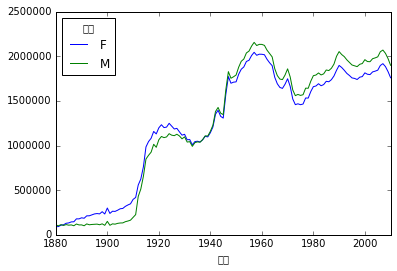

In [33]:
출생수합계.plot()

어떤 이름이 전체 출생수에서 차지하는 비율?

In [34]:
이름[:5]

,이름,성별,출생수,연도
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [35]:
출생수합계[:5]

성별,F,M
연도,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


1. 연도별 성별로 데이터프레임을 분류하고
2. 각 그룹의 출생수 비율을 구하는 함수를 정의한다.

In [37]:
연도별성별분류=이름.groupby(['연도', '성별'])

In [40]:
def 비율계산(그룹):
    그룹합계=그룹['출생수'].sum()
    비율 = 그룹['출생수'] / 그룹합계
    그룹['비율'] = 비율
    return 그룹

상위 1000개 이름들
연도별 성별 상위 1000개 이름만 골라내기

In [43]:
연도별성별분류

In [47]:
def 상위1000개추출(그룹):
    그룹_1k =그룹.sort_values(by='출생수', ascending=False)[:1000]
    return 그룹_1k

In [49]:
이름1k=연도별성별분류.apply(상위1000개추출)

In [51]:
연도별이름출생수합계=이름1k.pivot_table('출생수', aggfunc='sum', index='연도', columns='이름')

In [67]:
이름목록=연도별이름출생수합계[['John', 'Harry', 'Mary', 'Marlyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11aa03b70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c237940>], dtype=object)

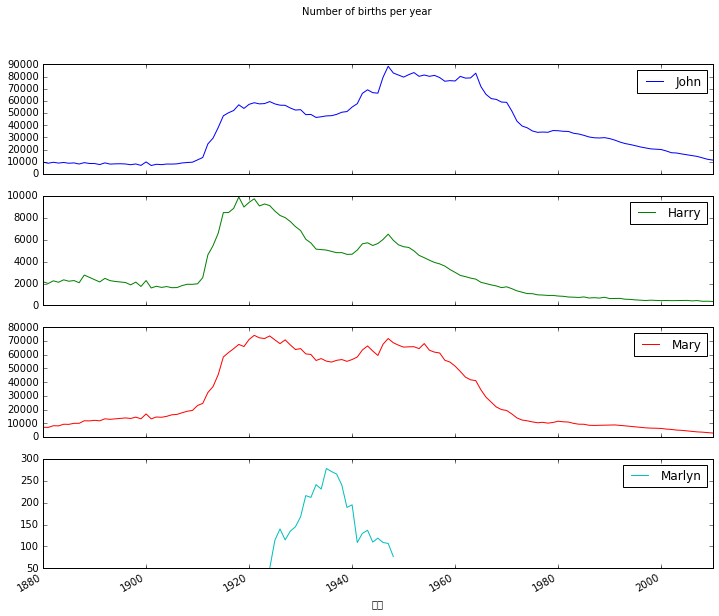

In [69]:
이름목록.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

분석목표 : 시간이 지날수록 더욱 다양한 이름들이 등장할까?

In [19]:
# range는 마지막 값을 생성할 값보다 1 더 크게 잡아야 함.
for i in range(1, 21):
    print ('{0}의 제곱값은 {1}입니다.'.format(i, i**i))

1의 제곱값은 1입니다.
2의 제곱값은 4입니다.
3의 제곱값은 27입니다.
4의 제곱값은 256입니다.
5의 제곱값은 3125입니다.
6의 제곱값은 46656입니다.
7의 제곱값은 823543입니다.
8의 제곱값은 16777216입니다.
9의 제곱값은 387420489입니다.
10의 제곱값은 10000000000입니다.
11의 제곱값은 285311670611입니다.
12의 제곱값은 8916100448256입니다.
13의 제곱값은 302875106592253입니다.
14의 제곱값은 11112006825558016입니다.
15의 제곱값은 437893890380859375입니다.
16의 제곱값은 18446744073709551616입니다.
17의 제곱값은 827240261886336764177입니다.
18의 제곱값은 39346408075296537575424입니다.
19의 제곱값은 1978419655660313589123979입니다.
20의 제곱값은 104857600000000000000000000입니다.


#### 문자열 양식

In [9]:
소개양식='저는 {0}입니다. 이메일은 {1}입니다.'
print(소개양식)

저는 {0}입니다. 이메일은 {1}입니다.


In [10]:
소개=소개양식.format('윤군', 'koon74@naver.com')
print(소개)

저는 윤군입니다. 이메일은 koon74@naver.com입니다.


In [72]:
이름.to_excel('이름.xlsx')

,이름,성별,출생수,연도,비율
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155
